In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\dnson\Downloads\employee_attrition.csv")

In [5]:
print(df.head())

   Age Department  Years_At_Company  Salary Overtime  JobSatisfaction  \
0   29      Sales                12      38       No                3   
1   23    Finance                12      98       No                1   
2   39       Tech                19      46       No                1   
3   37    Finance                14      46       No                5   
4   36       Tech                16      90       No                4   

  Attrition  
0        No  
1       Yes  
2        No  
3       Yes  
4       Yes  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               50 non-null     int64 
 1   Department        50 non-null     object
 2   Years_At_Company  50 non-null     int64 
 3   Salary            50 non-null     int64 
 4   Overtime          50 non-null     object
 5   JobSatisfaction   50 non-null     int64 
 6   Attrition         50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB
None


In [7]:
print(df.describe())

            Age  Years_At_Company      Salary  JobSatisfaction
count  50.00000          50.00000   50.000000        50.000000
mean   35.22000          10.20000   65.340000         3.080000
std     8.78842           6.38557   22.293598         1.626816
min    22.00000           0.00000   30.000000         1.000000
25%    27.25000           5.00000   46.000000         1.250000
50%    35.50000          10.00000   60.500000         3.000000
75%    42.25000          16.00000   86.750000         5.000000
max    54.00000          20.00000  100.000000         5.000000


In [8]:
print(df.isnull().sum())

Age                 0
Department          0
Years_At_Company    0
Salary              0
Overtime            0
JobSatisfaction     0
Attrition           0
dtype: int64


In [16]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df

,Age,Years_At_Company,Salary,JobSatisfaction,Department_HR,Department_Sales,Department_Tech,Overtime_Yes,Attrition_Yes
0,29,12,38,3,False,True,False,False,False
1,23,12,98,1,False,False,False,False,True
2,39,19,46,1,False,False,True,False,False
3,37,14,46,5,False,False,False,False,True
4,36,16,90,4,False,False,True,False,True
5,30,8,100,5,True,False,False,True,False
6,28,17,51,5,False,False,True,True,False
7,27,0,63,2,False,False,True,True,True
8,49,3,97,1,True,False,False,False,False
9,24,17,84,5,False,False,True,False,False


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv(r"C:\Users\dnson\Downloads\employee_attrition.csv")
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)     

Training set shape: (35, 6)
Testing set shape: (15, 6)


In [4]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Number of trees:", len(rf.estimators_))
print("Number of features:", rf.n_features_in_)

Number of trees: 100
Number of features: 6


Accuracy: 0.4666666666666667

Confusion Matrix:
 [[5 2]
 [6 2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15



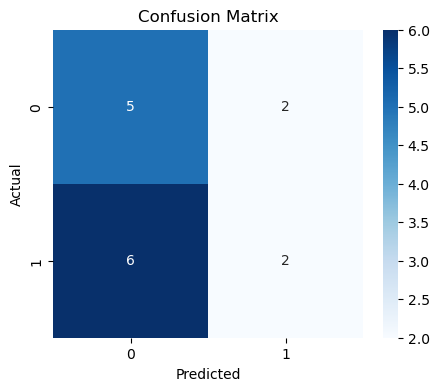

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Tuned Accuracy: 0.4666666666666667

Tuned Report:
               precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.50      0.25      0.33         8

    accuracy                           0.47        15
   macro avg       0.48      0.48      0.44        15
weighted avg       0.48      0.47      0.44        15


Top 10 Important Features:
            Feature  Importance
3            Salary    0.306880
0               Age    0.249353
2  Years_At_Company    0.181361
5   JobSatisfaction    0.126319
1        Department    0.102694
4          Overtime    0.033393


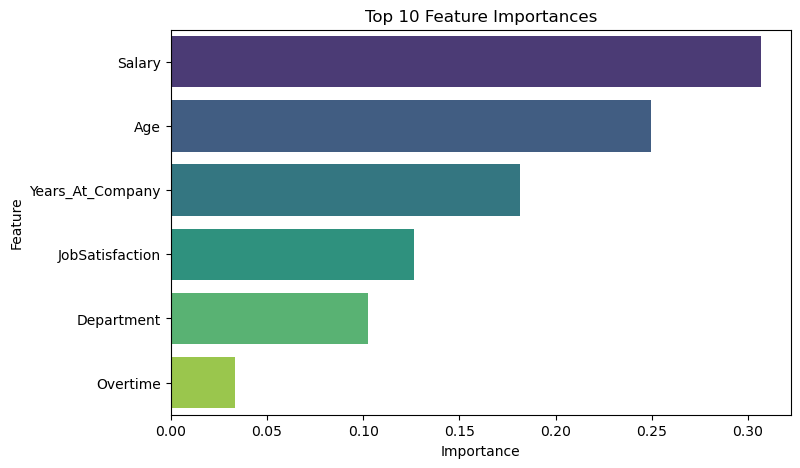

In [6]:
rf_tuned = RandomForestClassifier(
    n_estimators=200, max_depth=10, criterion="entropy", random_state=42
)
rf_tuned.fit(X_train, y_train)

y_pred_tuned = rf_tuned.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Report:\n", classification_report(y_test, y_pred_tuned))
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop 10 Important Features:")
print(importances.head(10))
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=importances.head(10),
    hue="Feature",
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Top 10 Feature Importances")
plt.show()

In [7]:
print("\n--- Insights & Conclusion ---")
print("Most important predictors of attrition are:\n", importances.head(5))
print("""
If I were the HR manager, I would act on these insights:
- If Overtime is a top factor → Reduce excessive overtime & balance workload.
- If Monthly Income is important → Review salary structure to improve retention.
- If Job Role/Department shows high attrition → Provide mentorship & better career growth.
- If Work-Life Balance or Environment Satisfaction matters → Encourage flexible work and improve work culture.
- Regular employee surveys → Address dissatisfaction early to reduce turnover.
""")


--- Insights & Conclusion ---
Most important predictors of attrition are:
             Feature  Importance
3            Salary    0.306880
0               Age    0.249353
2  Years_At_Company    0.181361
5   JobSatisfaction    0.126319
1        Department    0.102694

If I were the HR manager, I would act on these insights:
- If Overtime is a top factor → Reduce excessive overtime & balance workload.
- If Monthly Income is important → Review salary structure to improve retention.
- If Job Role/Department shows high attrition → Provide mentorship & better career growth.
- If Work-Life Balance or Environment Satisfaction matters → Encourage flexible work and improve work culture.
- Regular employee surveys → Address dissatisfaction early to reduce turnover.

